In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [5]:
df_jan = pd.read_parquet('fhv_tripdata_2021-01.parquet')

In [6]:
df_jan.shape

(1154112, 7)

In [7]:
df_jan['duration'] = df_jan.dropOff_datetime - df_jan.pickup_datetime
df_jan.duration = df_jan.duration.apply(lambda td: round(td.total_seconds() / 60, 2))

In [8]:
df_jan.duration.mean()

19.167224255533032

/Users/zorikhin/anaconda3/envs/mlzoomcamp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

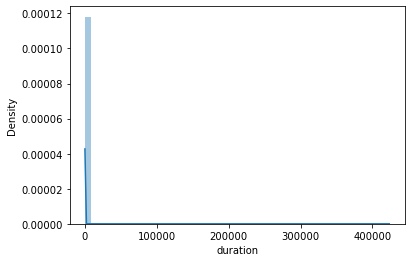

In [9]:
sns.distplot(df_jan.duration, label='duration')

In [10]:
df_jan[df_jan.duration > 60].count()

dispatching_base_num      29262
pickup_datetime           29262
dropOff_datetime          29262
PUlocationID               6702
DOlocationID              15932
SR_Flag                       0
Affiliated_base_number    29150
duration                  29262
dtype: int64

In [11]:
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]

/Users/zorikhin/anaconda3/envs/mlzoomcamp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

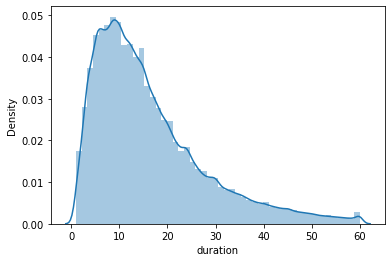

In [12]:
sns.distplot(df_jan.duration, label='duration')

In [13]:
df_jan[['PUlocationID', 'DOlocationID']] = df_jan[['PUlocationID', 'DOlocationID']].fillna(value=-1)

In [14]:
(df_jan.PUlocationID == -1).sum() / df_jan.PUlocationID.count()

0.8352732770722617

In [15]:
df_jan[['PUlocationID', 'DOlocationID']] = df_jan[['PUlocationID', 'DOlocationID']].astype(str)

In [16]:
train_dicts = df_jan[['PUlocationID', 'DOlocationID']].to_dict(orient='records')

dv = DictVectorizer()

In [17]:
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df_jan[target].values

In [18]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528521788891283

In [20]:
df_feb = pd.read_parquet('fhv_tripdata_2021-02.parquet')
df_feb['duration'] = df_feb.dropOff_datetime - df_feb.pickup_datetime
df_feb.duration = df_feb.duration.apply(lambda td: round(td.total_seconds() / 60, 2))
df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]
df_feb[['PUlocationID', 'DOlocationID']] = df_feb[['PUlocationID', 'DOlocationID']].fillna(value=-1)
df_feb[['PUlocationID', 'DOlocationID']] = df_feb[['PUlocationID', 'DOlocationID']].astype(str)

In [21]:
val_dicts = df_feb[['PUlocationID', 'DOlocationID']].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_feb[target].values

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.014281759154825